## In accordance to the "Titanic - Machine Learning from Disaster" competition.
https://www.kaggle.com/c/titanic

In [6]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [7]:
train_data = pd.read_csv('train.csv')

test_data = pd.read_csv('test.csv')

In [8]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Data Cleaning

In [9]:
print(train_data.isnull().sum(),"\n \n",test_data.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64 
 
 PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64


In [10]:
train_data = train_data.set_index('PassengerId')

test_data = test_data.set_index('PassengerId')

In [11]:
train_data = train_data.drop(['Cabin', 'Ticket', 'Name'], axis = 1)
test_data = test_data.drop(['Cabin', 'Ticket', 'Name'], axis = 1)

#Cabin has too many null values
#Name and ticket are not relevant for the current analysis

In [12]:
train_data = train_data.dropna(subset = ['Embarked'])

#very few values missing, therefore rows can be removed

In [13]:
train_data.describe(), test_data.describe()

(         Survived      Pclass         Age       SibSp       Parch        Fare
 count  889.000000  889.000000  712.000000  889.000000  889.000000  889.000000
 mean     0.382452    2.311586   29.642093    0.524184    0.382452   32.096681
 std      0.486260    0.834700   14.492933    1.103705    0.806761   49.697504
 min      0.000000    1.000000    0.420000    0.000000    0.000000    0.000000
 25%      0.000000    2.000000   20.000000    0.000000    0.000000    7.895800
 50%      0.000000    3.000000   28.000000    0.000000    0.000000   14.454200
 75%      1.000000    3.000000   38.000000    1.000000    0.000000   31.000000
 max      1.000000    3.000000   80.000000    8.000000    6.000000  512.329200,
            Pclass         Age       SibSp       Parch        Fare
 count  418.000000  332.000000  418.000000  418.000000  417.000000
 mean     2.265550   30.272590    0.447368    0.392344   35.627188
 std      0.841838   14.181209    0.896760    0.981429   55.907576
 min      1.000000  

In [14]:
train_data = train_data.fillna(30.0)
test_data = test_data.fillna(30.0)

In [15]:
print(train_data.isnull().sum(),"\n \n",test_data.isnull().sum())

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64 
 
 Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64


In [16]:
train_data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,,,,,,,,
1,0,3,male,22.0,1,0,7.2500,S
2,1,1,female,38.0,1,0,71.2833,C
3,1,3,female,26.0,0,0,7.9250,S
4,1,1,female,35.0,1,0,53.1000,S
5,0,3,male,35.0,0,0,8.0500,S


## Exploratory data analysis

<AxesSubplot:xlabel='Survived', ylabel='count'>

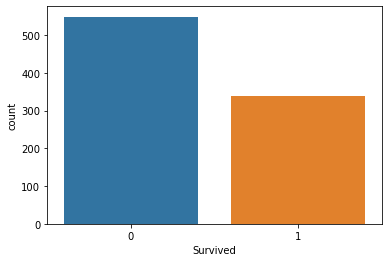

In [17]:
sns.countplot(data = train_data, x = 'Survived')

#A simple countplot comparing the no.fo people survived and deceased

<AxesSubplot:xlabel='Survived', ylabel='count'>

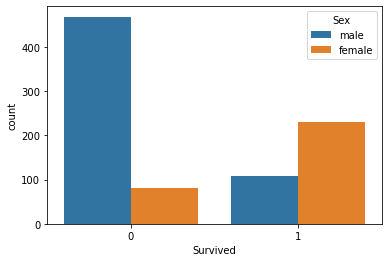

In [18]:
sns.countplot(data = train_data, x = 'Survived', hue = 'Sex')

#A much greater number of men died on the titanic as compared to women. Almost two-thirds of the people who survived were women

'A much greater number of people died in the third class as compared to other classes. On the contrary, there is not much \nvariation in the no. of people who survived on the basis of the class'

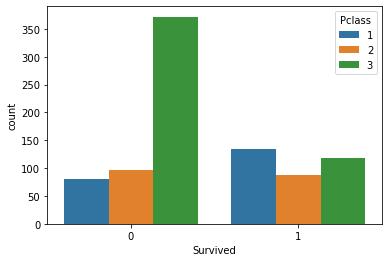

In [19]:
sns.countplot(data = train_data, x = 'Survived', hue = 'Pclass')

"""A much greater number of people died in the third class as compared to other classes. On the contrary, there is not much 
variation in the no. of people who survived on the basis of the class"""

<AxesSubplot:xlabel='Survived', ylabel='Age'>

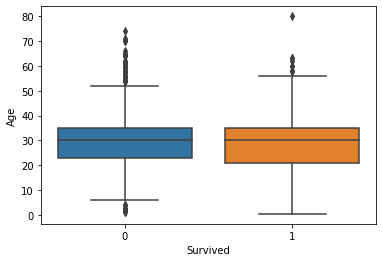

In [20]:
sns.boxplot(data = train_data, x = 'Survived', y = 'Age')

#No major variation in the age of the passengers of both categories

<AxesSubplot:xlabel='Survived', ylabel='count'>

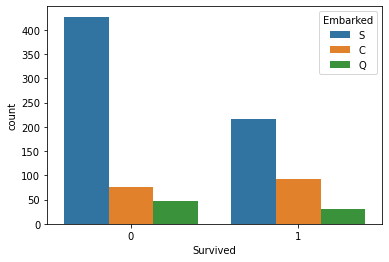

In [21]:
sns.countplot(data = train_data, x = 'Survived', hue = 'Embarked')

<AxesSubplot:xlabel='Pclass', ylabel='count'>

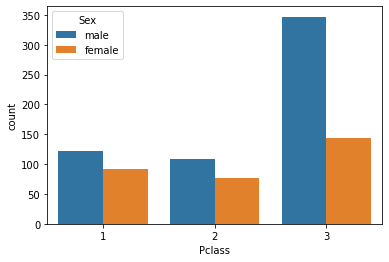

In [22]:
sns.countplot(data = train_data, x = 'Pclass', hue = 'Sex')

#A majority of people were travelling in the 3rd class. Most of them were men

<AxesSubplot:xlabel='Pclass', ylabel='Age'>

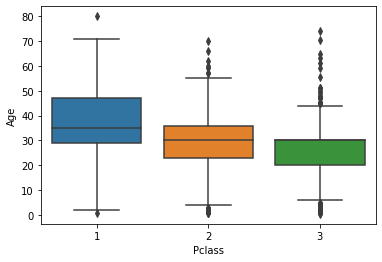

In [23]:
sns.boxplot(data = train_data, x = 'Pclass', y = 'Age')

#The passengers in the 1st class tended to be older people while the ones in 3rd class tended to be younger

<AxesSubplot:xlabel='Fare', ylabel='Age'>

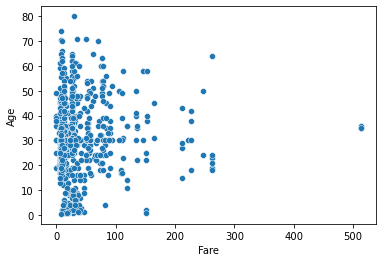

In [24]:
sns.scatterplot(data = train_data, x = 'Fare', y = 'Age')

#Most of the people had tickets with fare between 0 and 100, regardless of the age

<AxesSubplot:>

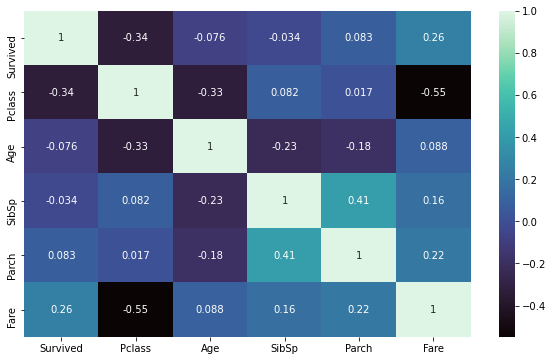

In [25]:
plt.figure(figsize = (10, 6))

sns.heatmap(data = train_data.corr(), cmap = 'mako', annot = True)

### Converting categorical data into numeric

In [26]:
train_data['is_male'] = train_data['Sex'].map({'male' : 1, 'female' : 0})
test_data['is_male'] = test_data['Sex'].map({'male' : 1, 'female' : 0})

In [27]:
train_data = train_data.drop('Sex', axis = 1)
test_data = test_data.drop('Sex', axis = 1)

In [28]:
Embark_dummy_train = pd.get_dummies(data = train_data['Embarked'], drop_first = True)
Embark_dummy_test = pd.get_dummies(data = test_data['Embarked'], drop_first = True)

In [29]:
train_data.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Embarked,is_male
PassengerId,,,,,,,,
1,0,3,22.0,1,0,7.2500,S,1
2,1,1,38.0,1,0,71.2833,C,0
3,1,3,26.0,0,0,7.9250,S,0
4,1,1,35.0,1,0,53.1000,S,0
5,0,3,35.0,0,0,8.0500,S,1


In [30]:
train_data = pd.concat([train_data, Embark_dummy_train], axis = 1)
test_data = pd.concat([test_data, Embark_dummy_test], axis = 1)

In [31]:
train_data = train_data.drop('Embarked', axis = 1)
test_data = test_data.drop('Embarked', axis = 1)

## Creating and implementing model

In [32]:
X_train = train_data[['Pclass', 'Age', 'Fare','is_male', 'Q', 'S']]
y_train = train_data['Survived']

X_test = test_data[['Pclass', 'Age', 'Fare','is_male', 'Q', 'S']]

In [33]:
from sklearn.linear_model import LogisticRegression

In [34]:
logreg = LogisticRegression()

In [35]:
logreg.fit(X_train, y_train)

LogisticRegression()

In [36]:
predictions = logreg.predict(X_test)

In [37]:
result = pd.DataFrame(predictions, index = test_data.index)

In [38]:
result = result.rename(columns = {0 : 'Survived'})

In [39]:
result.to_csv('results.csv')

In [40]:
result.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 418 entries, 892 to 1309
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   Survived  418 non-null    int64
dtypes: int64(1)
memory usage: 6.5 KB
